### 生成qrcode
### 20191031

In [3]:
from PIL import Image
import qrcode,os

def create_qrcode(url,qrcodename, img_path):
    qr = qrcode.QRCode(
    version=1, # 设置容错率为最高
    error_correction=qrcode.ERROR_CORRECT_H, # 用于控制二维码的错误纠正程度
    box_size=8, # 控制二维码中每个格子的像素数，默认为10
    border=1, # 二维码四周留白，包含的格子数，默认为4
    #image_factory=None, 保存在模块根目录的image文件夹下
    #mask_pattern=None
    )

    qr.add_data(url) # QRCode.add_data(data)函数添加数据
    qr.make(fit=True) # QRCode.make(fit=True)函数生成图片

    img = qr.make_image()
    img = img.convert("RGBA") # 二维码设为彩色
    logo = Image.open(img_path) # 传gif生成的二维码也是没有动态效果的
    
    w , h = img.size
    logo_w, logo_h = logo.size
    factor = 4 # 默认logo最大设为图片的四分之一
    s_w = int(w / factor)
    s_h = int(h / factor)
    if logo_w > s_w or logo_h > s_h:
        logo_w = s_w
        logo_h = s_h

    logo = logo.resize((logo_w, logo_h), Image.ANTIALIAS)
    l_w = int((w - logo_w) / 2)
    l_h = int((h - logo_h) / 2)
    logo = logo.convert("RGBA")
    img.paste(logo, (l_w, l_h), logo)
    img.show()
    img.save(os.getcwd()+'/' + qrcodename + '.png', quality=100)

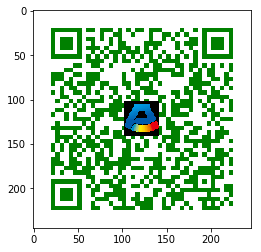

In [6]:
import qrcode
from PIL import Image
import matplotlib.pyplot as plt


def getQRcode(data, file_name, img_path):
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=5,
        border=4,
    )

    # 添加数据
    qr.add_data(data)
    # 填充数据
    qr.make(fit=True)
    # 生成图片
    img = qr.make_image(fill_color="green", back_color="white")

    # 添加logo，打开logo照片
    icon = Image.open(img_path)
    # 获取图片的宽高
    img_w, img_h = img.size
    # 参数设置logo的大小
    factor = 6
    size_w = int(img_w / factor)
    size_h = int(img_h / factor)
    icon_w, icon_h = icon.size
    if icon_w > size_w:
        icon_w = size_w
    if icon_h > size_h:
        icon_h = size_h
    # 重新设置logo的尺寸
    icon = icon.resize((icon_w, icon_h))
    # 得到画图的x，y坐标，居中显示
    w = int((img_w - icon_w) / 2)
    h = int((img_h - icon_h) / 2)
    # 黏贴logo照
    img.paste(icon, (w, h), mask=None)
    # 终端显示图片
    plt.imshow(img)
    plt.show()
    # 保存img
    img.save(file_name)
    return img


if __name__ == '__main__':
    getQRcode("http://www.jishimed.com/download/app1.1.4.apk", "app1.1.4.png", "logo.png")

In [4]:
create_qrcode("http://www.jishimed.com/download/app1.1.4.apk", "app1.1.4.png", "logo.png")

In [ ]:
import qrcode as qr
qr.make("http://www.jishimed.com/download/app1.1.4.apk", "app1.1.4.png", "logo.png")